# Cancer Detection

This project aims to predict cancer in a patients based on the intensity of two different genes.

## Steps

* Libraries Importing I
* Data Importing 
* Data Wrangling
* Data Visualization
* Libraries Importing II
* Model Creation and Prediction
* Model parameters tuning and Prediction

# Libraries Importing I

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

In [6]:
gene_df = pd.read_csv("gene_expression.csv")

In [7]:
gene_df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# Data Wrangling

In [8]:
gene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [9]:
gene_df.duplicated().sum()

862

In [10]:
gene_df = gene_df.drop_duplicates()

In [11]:
gene_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        2138 non-null   float64
 1   Gene Two        2138 non-null   float64
 2   Cancer Present  2138 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 66.8 KB


Duplicated values dropped but no null values

# Data Visualization

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

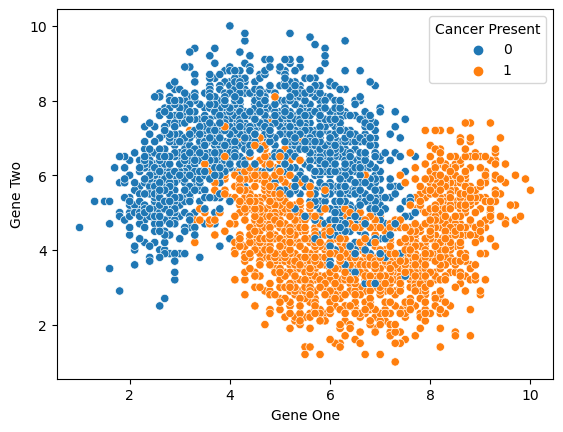

In [12]:
sns.scatterplot(data=gene_df, x="Gene One", y="Gene Two", hue="Cancer Present")

The classes seem mostly well seperated. Now taking a look at the 3-D version showing similar distrubution

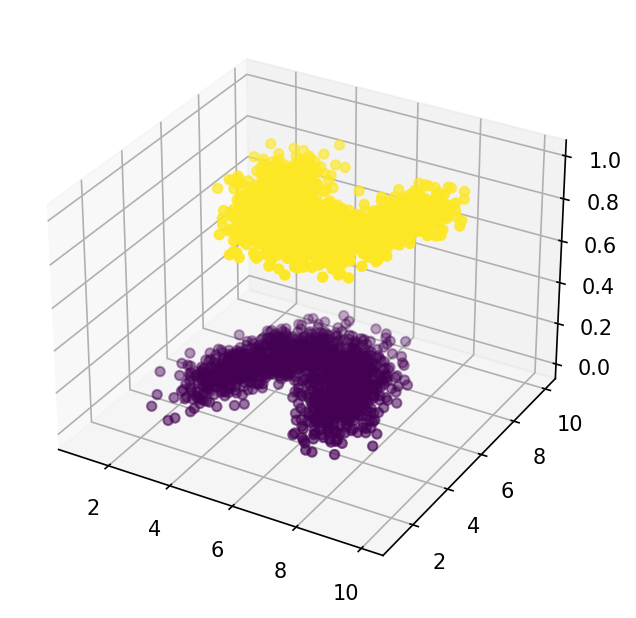

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gene_df['Gene One'],gene_df['Gene Two'],gene_df['Cancer Present'],c=gene_df["Cancer Present"])

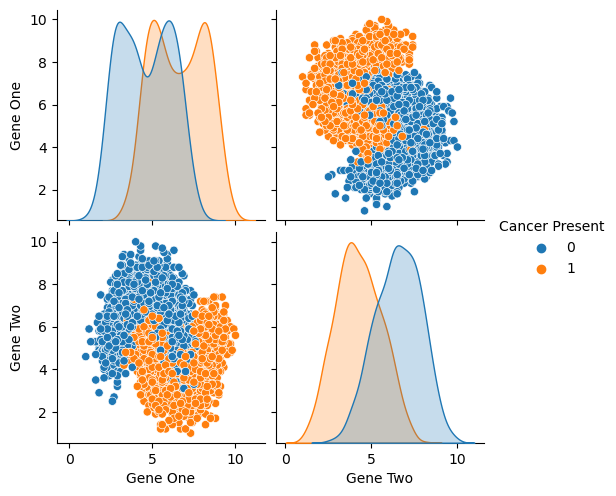

In [14]:
sns.pairplot(gene_df, hue="Cancer Present")

There seems to be a clear seperation between the two classes and KNN and SVM can be used to attain a great degree of accuracy

# Libraries Importing II

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [16]:
X = gene_df.drop("Cancer Present", axis=1)
y = gene_df["Cancer Present"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=232)

# Model Creation and Prediction

In [18]:
svc_model = SVC()

In [19]:
knn_model = KNeighborsClassifier()

In [20]:
svc_model.fit(X_train, y_train)

SVC()

In [21]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
svc_pred = svc_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
print("The accuracy of the Support Vector Classifier model is ", accuracy_score(y_test, svc_pred))

The accuracy of the Support Vector Classifier model is  0.9320113314447592


In [25]:
print("The accuracy of the K Nearest Neigbours model is ", accuracy_score(y_test, knn_pred))

The accuracy of the Support Vector Classifier model is  0.9220963172804533


That is a high accuracy without any form of tuning. For the classification report, we have

In [26]:
print("Support Vector Classifier model \n", classification_report(y_test, svc_pred))

Support Vector Classifier model 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       362
           1       0.92      0.94      0.93       344

    accuracy                           0.93       706
   macro avg       0.93      0.93      0.93       706
weighted avg       0.93      0.93      0.93       706



In [28]:
print("K Nearest Neigbours model \n", classification_report(y_test, knn_pred))

K Nearest Neigbours model 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       362
           1       0.92      0.92      0.92       344

    accuracy                           0.92       706
   macro avg       0.92      0.92      0.92       706
weighted avg       0.92      0.92      0.92       706



The support vector classifier model performs slightly better than the K nearest neighbors model

# Model Parameters Tuning and Prediction

In [34]:
knn_accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_pred))

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

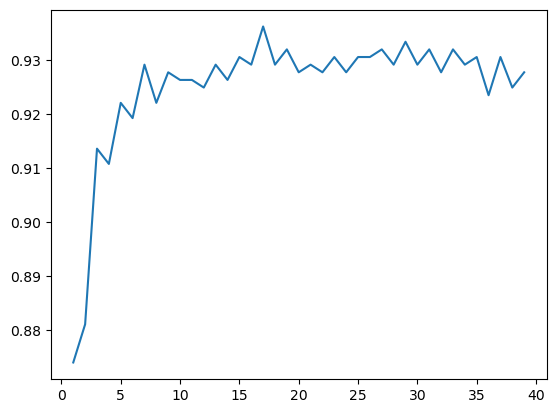

In [35]:
plt.plot(np.arange(1,40), knn_accuracy)

In [46]:
svc_accuracy = []

for i in range(1,10):
    svc = SVC(C=i*0.1)
    svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    svc_accuracy.append(accuracy_score(y_test, svc_pred))

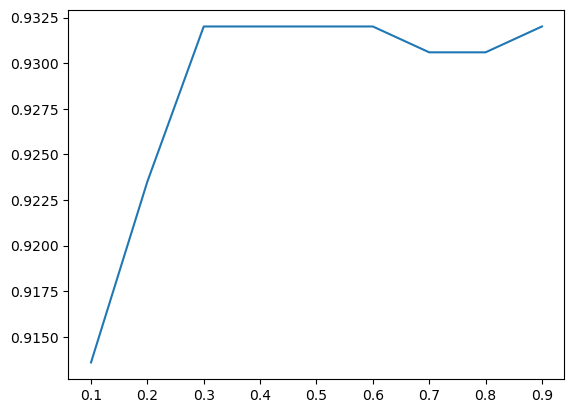

In [47]:
plt.plot([i * 0.1 for i in range(1,10)], svc_accuracy)

For both models, we can see that the initial accuracy is the same as the highest for the optimal points of the tuning process. Although a higher accuracy might not be achieved, a better recall would be suited for the situation of predicting cancer. It is better to get more false positives than false negatives. Hence the threshold can be adjusted for the support vector machine such that the recall for a positive cancer is 100 percent without sacrificing much accuracy